# 频次直方图、数据区间划分和分布密度

一个简易的频次直方图可以是理解数据集的良好开端。

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [2]:
data = np.random.randn(1000)

(array([  9.,  31.,  81., 178., 225., 231., 167.,  61.,  12.,   5.]),
 array([-3.06421278, -2.42241499, -1.7806172 , -1.13881941, -0.49702162,
         0.14477618,  0.78657397,  1.42837176,  2.07016955,  2.71196734,
         3.35376513]),
 <BarContainer object of 10 artists>)

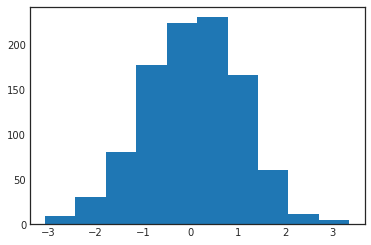

In [3]:
plt.hist(data)  # 一个简易的频次直方图

(array([ 2.,  1.,  6.,  6.,  9., 16., 18., 25., 38., 47., 57., 74., 69.,
        73., 83., 83., 74., 74., 83., 45., 39., 24., 22., 15.,  4.,  2.,
         6.,  3.,  1.,  1.]),
 array([-3.06421278, -2.85028018, -2.63634759, -2.42241499, -2.20848239,
        -1.99454979, -1.7806172 , -1.5666846 , -1.352752  , -1.13881941,
        -0.92488681, -0.71095421, -0.49702162, -0.28308902, -0.06915642,
         0.14477618,  0.35870877,  0.57264137,  0.78657397,  1.00050656,
         1.21443916,  1.42837176,  1.64230436,  1.85623695,  2.07016955,
         2.28410215,  2.49803474,  2.71196734,  2.92589994,  3.13983253,
         3.35376513]),
 [<matplotlib.patches.Polygon at 0x7f9dfe253160>])

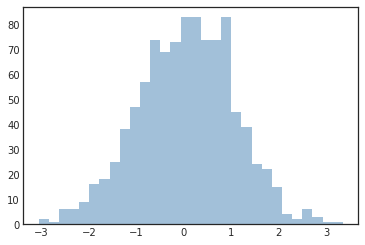

In [4]:
# plt.hist(data, bins=30, normed=True, alpha=0.5, histtype='stepfilled', color='steelblue', edgecolor='none')  # 'Polygon' object has no property 'normed'
plt.hist(data, bins=30, alpha=0.5, histtype='stepfilled', color='steelblue', edgecolor='none')                 # 自定义的频次直方图

(array([ 1.,  0.,  2.,  1.,  0.,  8.,  9.,  7., 14., 23., 29., 33., 36.,
        35., 58., 55., 58., 65., 55., 73., 60., 72., 46., 48., 49., 40.,
        29., 17., 28., 12., 13.,  6.,  5.,  8.,  0.,  2.,  1.,  1.,  0.,
         1.]),
 array([-3.1279761 , -2.80080623, -2.47363637, -2.1464665 , -1.81929664,
        -1.49212678, -1.16495691, -0.83778705, -0.51061719, -0.18344732,
         0.14372254,  0.4708924 ,  0.79806227,  1.12523213,  1.45240199,
         1.77957186,  2.10674172,  2.43391159,  2.76108145,  3.08825131,
         3.41542118,  3.74259104,  4.0697609 ,  4.39693077,  4.72410063,
         5.05127049,  5.37844036,  5.70561022,  6.03278009,  6.35994995,
         6.68711981,  7.01428968,  7.34145954,  7.6686294 ,  7.99579927,
         8.32296913,  8.65013899,  8.97730886,  9.30447872,  9.63164858,
         9.95881845]),
 [<matplotlib.patches.Polygon at 0x7f9dfe1d0eb8>])

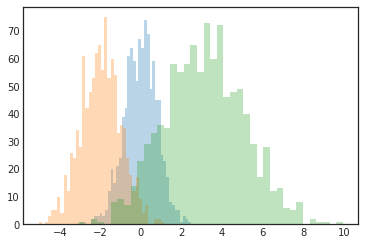

In [5]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

# kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)  # 'Polygon' object has no property 'normed'
kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)  # 同坐标轴的多个频次直方图

In [6]:
counts, bin_edges = np.histogram(data, bins=5)  # 如果只需要简单地计算频次直方图（就是计算每段区间的样本数），而并不想画图显示它们，那么可以直接用 np.histogram()：
print(counts)

[ 40 259 456 228  17]


## 1. 二维频次直方图与数据区间划分

就像将一维数组分为区间创建一维频次直方图一样，我们也可以将二维数组按照二维区间进行切分，来创建二维频次直方图。  
首先，用一个多元高斯分布（`multivariate Gaussian distribution`）生成 `x` 轴与 `y` 轴的样本数据：

In [7]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

### 1.1. plt.hist2d：二维频次直方图

画二维频次直方图最简单的方法就是使用 `Matplotlib` 的 `plt.hist2d` 函数。

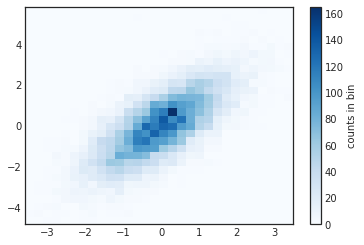

In [8]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

In [9]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)  # 就像 plt.hist 有一个只计算结果不画图的 np.histogram 函数一样，plt.hist2d 类似的函数是 np.histogram2d

### 1.2. plt.hexbin：六边形区间划分

二维频次直方图是由与坐标轴正交的方块分割而成的，还有一种常用的方式是用正六边形分割。  
`Matplotlib` 提供了 `plt.hexbin` 满足此类需求，将二维数据集分割成蜂窝状。

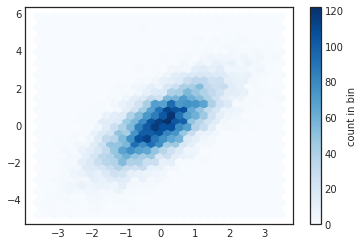

In [10]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

### 1.3. 核密度估计

还有一种评估多维数据分布密度的常用方法是**核密度估计**（`kernel density estimation`，`KDE`）。  
现在先来简单地演示如何用 `KDE` 方法“抹掉”空间中离散的数据点，从而拟合出一个平滑的函数。  
在 `scipy.stats` 程序包里面有一个简单快速的 `KDE` 实现方法，下面就是用这个方法演示的简单示例：

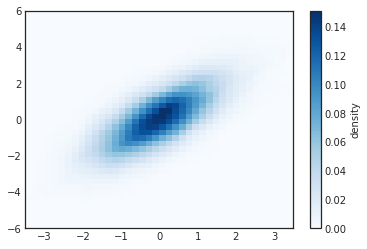

In [11]:
from scipy.stats import gaussian_kde

# 拟合数组维度[Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# 用一对规则的网格数据进行拟合
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# 画出结果图
plt.imshow(Z.reshape(Xgrid.shape), origin='lower', aspect='auto', extent=[-3.5, 3.5, -6, 6], cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")

`KDE` 方法通过不同的平滑带宽长度（`smoothing length`）在拟合函数的准确性与平滑性之间作出权衡（无处不在的偏差与方差的取舍问题的一个例子）。  
想找到恰当的平滑带宽长度是件很困难的事，`gaussian_kde` 通过一种经验方法试图找到输入数据平滑长度的近似最优解。  
在 `SciPy` 的生态系统中还有其他的 `KDE` 方法实现，每种版本都有各自的优缺点，例如 `sklearn.neighbors.KernelDensity` 和 `statsmodels.nonparametric.kernel_density.KDEMultivariate`  
用 `Matplotlib` 做 `KDE` 的可视化图的过程比较繁琐，`Seaborn` 程序库提供了一个更加简洁的 `API` 来创建基于 `KDE` 的可视化图。